In [56]:
#importing required library:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix



In [3]:
data=pd.read_csv("E:\data set\diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

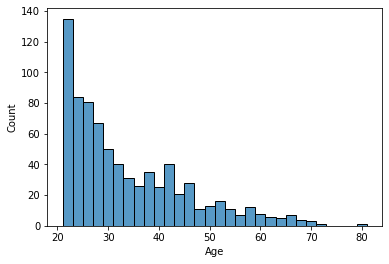

In [10]:
sns.histplot(data['Age'],bins=30)


<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

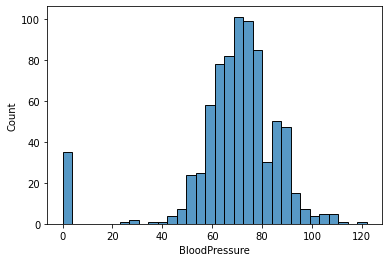

In [11]:
sns.histplot(data['BloodPressure'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

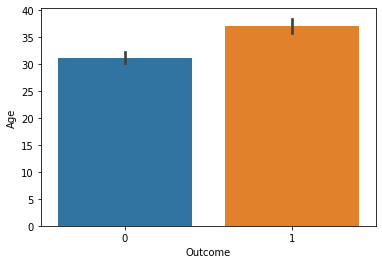

In [12]:
sns.barplot(data['Outcome'],data['Age'])

In [14]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
data.shape

(768, 9)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

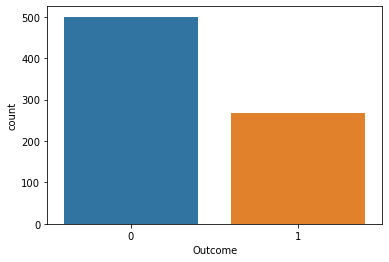

In [16]:
sns.countplot(x="Outcome",data=data)


In [18]:
yes= data[data['Outcome']==1]
no=data[data['Outcome']==0]

In [19]:
yes.shape

(268, 9)

In [20]:
no.shape

(500, 9)

In [21]:
no_sample=no.sample(n=268)

In [23]:
no_sample.shape

(268, 9)

In [24]:
new_df=pd.concat([no_sample,yes],axis=0)

In [25]:
for i in new_df:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [27]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
536,0,105,90,0,0,29.6,0.197,46,0
168,4,110,66,0,0,31.9,0.471,29,0
596,0,67,76,0,0,45.3,0.194,46,0
517,7,125,86,0,0,37.6,0.304,51,0
117,5,78,48,0,0,33.7,0.654,25,0


<AxesSubplot:xlabel='Outcome', ylabel='count'>

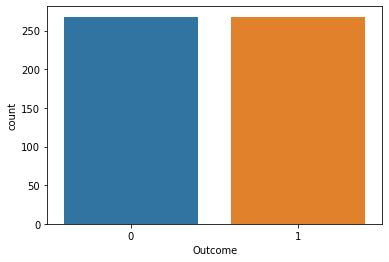

In [28]:
sns.countplot(x='Outcome',data=new_df)

In [30]:
x= new_df.drop(columns ='Outcome')
y=new_df['Outcome']

In [31]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
536            0      105             90              0        0  29.6   
168            4      110             66              0        0  31.9   
596            0       67             76              0        0  45.3   
517            7      125             86              0        0  37.6   
117            5       78             48              0        0  33.7   
..           ...      ...            ...            ...      ...   ...   
755            1      128             88             39      110  36.5   
757            0      123             72              0        0  36.3   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  
536                     0.197   46  
168                     0.471   29  


In [32]:
print(y)

536    0
168    0
596    0
517    0
117    0
      ..
755    1
757    1
759    1
761    1
766    1
Name: Outcome, Length: 536, dtype: int64


In [33]:
model=LogisticRegression()

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=44)

In [37]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred=model.predict(x_test)

In [39]:
print(confusion_matrix(y_test,y_pred))

[[65 16]
 [21 59]]


<AxesSubplot:>

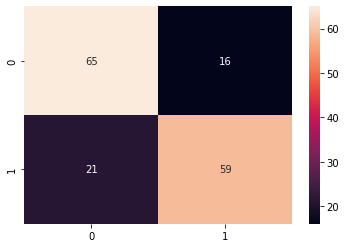

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [42]:
accuracy_score(y_test,y_pred)

0.7701863354037267

In [44]:
print('error metric\n\n',classification_report(y_test,y_pred))

error metric

               precision    recall  f1-score   support

           0       0.76      0.80      0.78        81
           1       0.79      0.74      0.76        80

    accuracy                           0.77       161
   macro avg       0.77      0.77      0.77       161
weighted avg       0.77      0.77      0.77       161



In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=22)

In [48]:
model_2= RandomForestClassifier()

In [49]:
model_2.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_hat=model.predict(x_test)

In [53]:
confusion_matrix(y_test,y_hat)

array([[63, 18],
       [19, 61]], dtype=int64)

In [54]:
accuracy_score(y_test,y_hat)

0.7701863354037267

<AxesSubplot:>

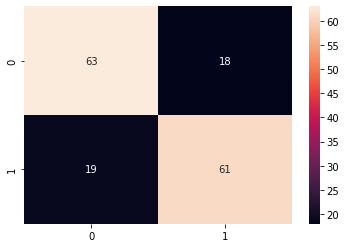

In [55]:
sns.heatmap(confusion_matrix(y_test,y_hat),annot=True)